<a href="https://colab.research.google.com/github/ucfilho/Disciplina_Metodos_Numericos_2020/blob/master/Mod_03_class_10_ode_pendulum_out_13_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

In [2]:
!git clone https://github.com/ucfilho/Disciplina_Metodos_Numericos_2020 #clonar do Github
%cd Disciplina_Metodos_Numericos_2020

fatal: destination path 'Disciplina_Metodos_Numericos_2020' already exists and is not an empty directory.
/content/Disciplina_Metodos_Numericos_2020


In [3]:
# problem pendulum using rk4- please compare Mod_03_class_03_double_pendulum.ipynb

In [4]:
from edo_rk4 import rk4


pi=np.pi
g = 9.82
L = 0.5
m = 0.1
def model(x, t):
  """
  The right-hand side of the pendulum ODE
  """
  x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
  dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * np.cos(x1-x2) * x4)/(16 - 9 * np.cos(x1-x2)**2)
  dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * np.cos(x1-x2) * x3)/(16 - 9 * np.cos(x1-x2)**2)
  dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * np.sin(x1-x2) + 3 * (g/L) * np.sin(x1))
  dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1-x2) + (g/L) * np.sin(x2))
  return [dx1, dx2, dx3, dx4]



In [5]:
# initial state
x0 = [pi/4, pi/2, 0, 0]
# time coodinate to solve the ODE for: from 0 to 10 seconds
t = np.linspace(0, 5, 250)
dt=t[1]-t[0]

In [6]:
# compute various numerical solutions
x = rk4( model, x0, t )


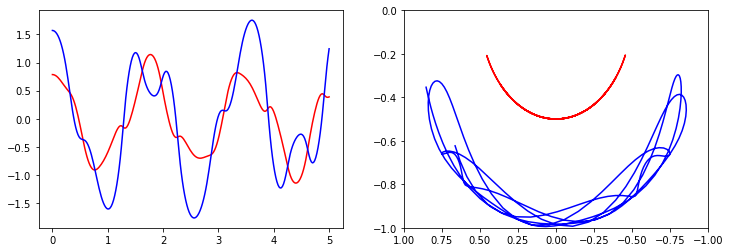

In [7]:
# plot the angles as a function of time
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")
x1 = + L * np.sin(x[:, 0])
y1 = - L * np.cos(x[:, 0])
x2 = x1 + L * np.sin(x[:, 1])
y2 = y1 - L * np.cos(x[:, 1])
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

In [ ]:
# Set new figure parameters
newparams = {'axes.labelsize': 11, 'axes.linewidth': 0.5, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (3, 2),
             'ytick.labelsize': 5, 'xtick.labelsize': 5,}
plt.rcParams.update(newparams)



# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-1.2, 0))
line, = ax.plot([], [], lw=1)

#line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

anim = animation.FuncAnimation(fig, animate, np.arange(1, len(x)),
                              interval=25, blit=True, init_func=init)

#ani.save('double_pendulum.mp4', fps=15)
# Call our new function to display the animation
HTML(anim.to_html5_video())